In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# open the data
df = pd.read_csv('../input/credit-card-fraud/card_transdata.csv')

In [12]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [13]:
# statistics of dataframe
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# information about the dataframe
# There's not null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


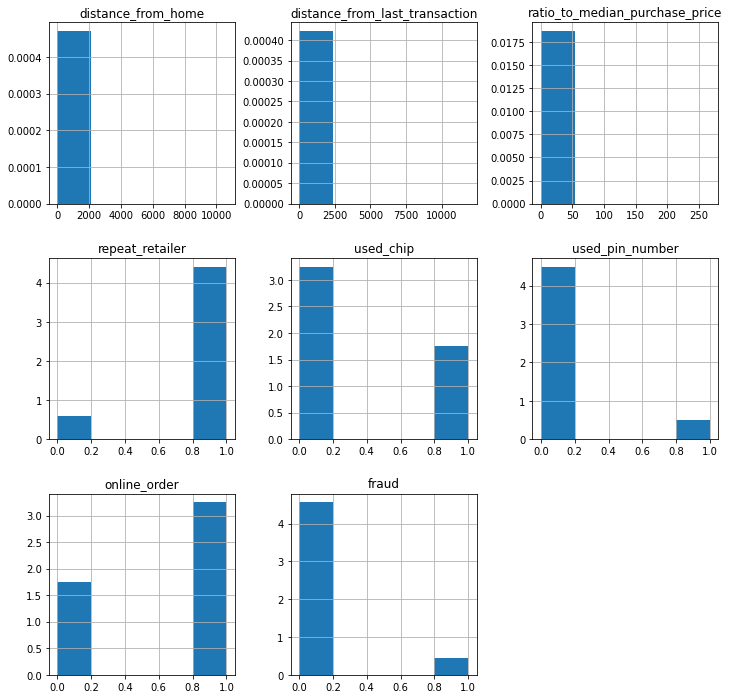

In [15]:
# histogram of all columns of dataframe

df.hist(bins=5, figsize=(12,12), density=True)
plt.show()

In [16]:
# we can divide the dataframe in two dataframes, to make analysis in fraud transactions and normal transactions 
df_fraud = df[df['fraud'] == 1]
df_notfraud = df[df['fraud'] == 0]

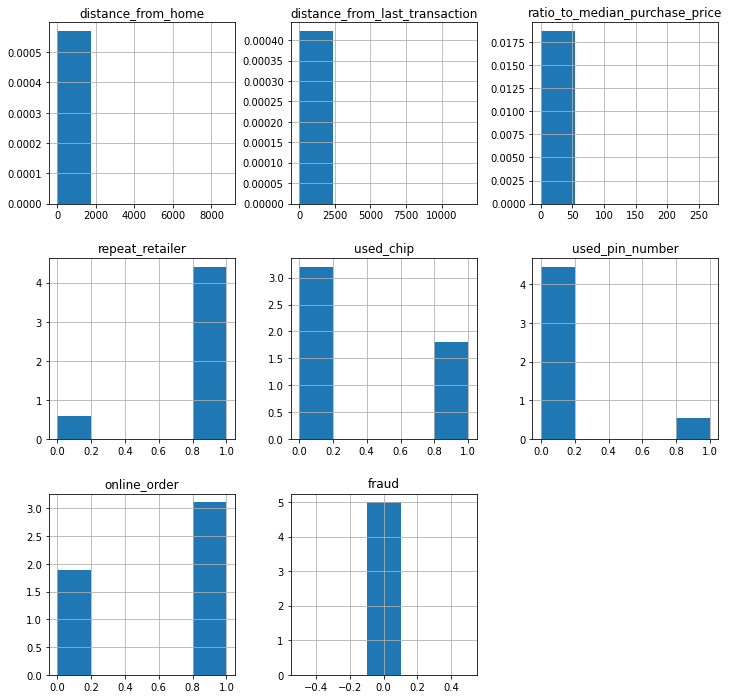

In [17]:
# histogram normal transactions
df_notfraud.hist(bins=5, figsize=(12,12), density=True)
plt.show()

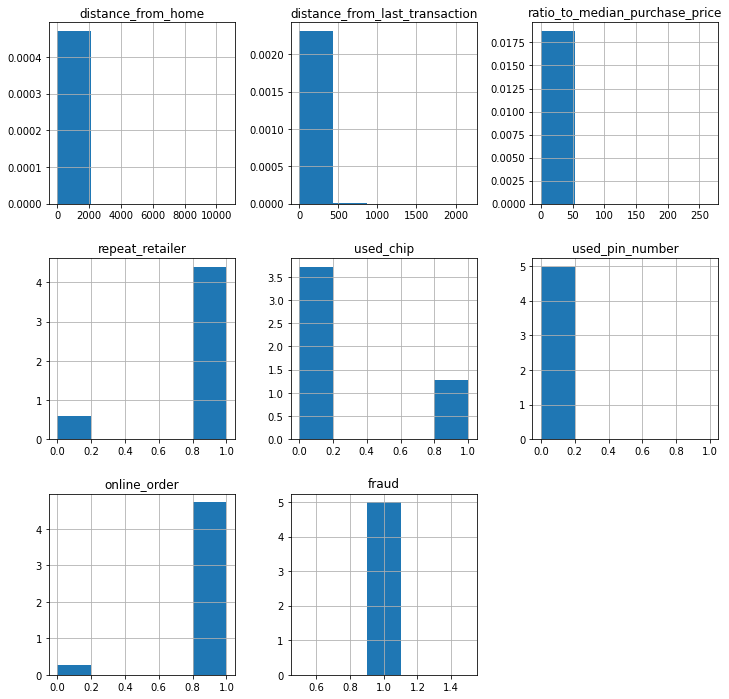

In [18]:
# histogram fraud transactions
df_fraud.hist(bins=5, figsize=(12,12), density=True)
plt.show()

In [19]:
# 99% of frauds transactions didn't utilize the Pin Number in transaction. 

count = df_fraud['used_pin_number'].value_counts()
print(f"Transactions not used Pin Number: {count[0]}")
print(f"\nTransactions used Pin Number: {count[1]}")

Transactions not used Pin Number: 87130

Transactions used Pin Number: 273


In [20]:
# The median of distance from last transaction of frauds transactions is three more than normal transactions

mean_frauds = df_fraud['distance_from_last_transaction'].mean()
mean_notfrauds = df_notfraud['distance_from_last_transaction'].mean()
print(f"Mean of distance from last transaction of frauds transactions : {round(mean_frauds,2)} ")
print(f"\nMean of distance from last transaction of no frauds transactions : {round(mean_notfrauds,2)} ")

Mean of distance from last transaction of frauds transactions : 12.71 

Mean of distance from last transaction of no frauds transactions : 4.3 


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

<AxesSubplot:xlabel='fraud', ylabel='count'>

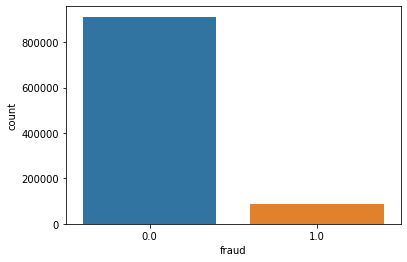

In [22]:
# it's so disproportionate number of samples each classes
# we can use the oversampling to balance the classes through the creation new data
sns.countplot (x = df['fraud'])

In [23]:
# defining the features to models
x = df.drop('fraud', axis = 1).values
y = df['fraud'].values

In [24]:
# standardization of data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [25]:
# splitting the data in train data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 0) 

In [26]:
# appling the oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
x_over, y_over = smote.fit_resample(x_train,y_train)

In [27]:
print(f'size y_train before smote: {len(y_train)}')
print(f'size y_train after the smote: {len(y_over)}')

size y_train before smote: 700000
size y_train after the smote: 1277380


In [28]:
old_values = np.unique(y_train, return_counts=True)
new_values = np.unique(y_over, return_counts=True)

In [29]:
print(f'count values before the smote: {old_values}')
print(f'count values before the smote: {new_values}')

count values before the smote: (array([0., 1.]), array([638690,  61310]))
count values before the smote: (array([0., 1.]), array([638690, 638690]))


In [41]:
# training the models
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_over, y_over)

naive_bayers = GaussianNB()
naive_bayers.fit(x_over, y_over)

logistic = LogisticRegression()
logistic.fit(x_over, y_over)

tree = DecisionTreeClassifier()
tree.fit(x_over, y_over)

DecisionTreeClassifier()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# predictions of models
tree_pred = tree.predict(x_test)
knn_pred = knn.predict(x_test)
naive_pred = naive_bayers.predict(x_test)
logistic_pred = logistic.predict(x_test)

In [43]:
# Accucary of models 
print("accuracy of KNN                 ", round(accuracy_score(y_test, knn_pred), 2))
print("\naccuracy of Naive Bayers        ", round(accuracy_score(y_test,naive_pred), 2))
print("\naccuracy of Logistic Regression ", round(accuracy_score(y_test,logistic_pred), 2))
print("\naccuracy of Decision Tree       ", round(accuracy_score(y_test,tree_pred), 2))

accuracy of KNN                  1.0

accuracy of Naive Bayers         0.86

accuracy of Logistic Regression  0.93

accuracy of Decision Tree        1.0


In [44]:
# confusion matrix of KNN
confusion_matrix(y_test, knn_pred)

array([[273418,    489],
       [    54,  26039]])

<AxesSubplot:>

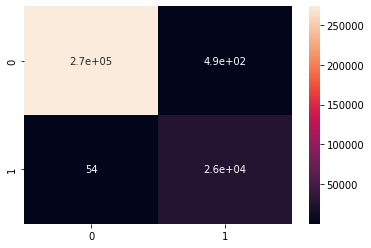

In [45]:
cm=confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True)

In [46]:
# confusion matrix of Decision Tree
confusion_matrix(y_test, tree_pred)

array([[273902,      5],
       [     3,  26090]])

<AxesSubplot:>

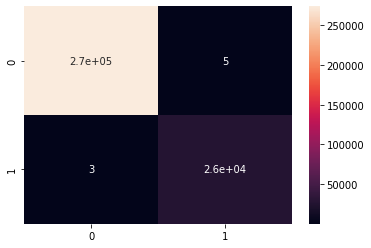

In [47]:
cm=confusion_matrix(y_test, tree_pred)
sns.heatmap(cm, annot=True) 

In [48]:
# Other metrics of KNN model:
print(classification_report(y_test, knn_pred) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273907
         1.0       0.98      1.00      0.99     26093

    accuracy                           1.00    300000
   macro avg       0.99      1.00      0.99    300000
weighted avg       1.00      1.00      1.00    300000



In [49]:
# Other metrics of Decision Tree model:
print(classification_report(y_test, tree_pred) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    273907
         1.0       1.00      1.00      1.00     26093

    accuracy                           1.00    300000
   macro avg       1.00      1.00      1.00    300000
weighted avg       1.00      1.00      1.00    300000



In [40]:
# The KNN and Decision Tree was the models with best performance.

# The majority frauds transactions happen without use Pin Number, so Pin Number can help to identify frauds

# And frauds transactions have a averange of distance from last transaction longer than normal transaction,
# so that's can be another feature to identify the frauds